In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [46]:
df = pd.read_csv('C:\BTS_Master\BTS_DataScienceFoundations/Session_2/2_titanic_dataset.csv')

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Where there more womens or mens onboard?

In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### In wich class were most passengers traveling?

In [45]:
df['Pclass'].value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

### There where more mens than womens onboard but which ones had better chances of survival?

In [37]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


As expected women had a lot better chances of survival, 74.2% against 18.9% for men

### And the with the different classes? We will probably also find some difference there too

In [39]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Not surprisingly the passengers in first pclass had a lot better chances of survival

### Lets try to separate the chances of each sex in different classes

In [43]:
df[['Pclass', 'Survived', 'Sex']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

theres is a big difference of the chances of survival, even for women who had a better chance of survival overall, if they were in third class they had only 50% chance of survival compared with almost 97% for first class

### Check the age distribuition of passengers, where they young people in average?

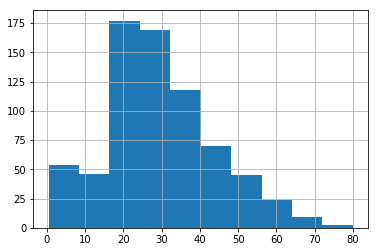

In [16]:
df['Age'].hist()

### Are there values missing for age?

In [49]:
df['Age'].isnull().sum()

177

### Should we drop the missing rows or try to replace the values with the mean?

In [21]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

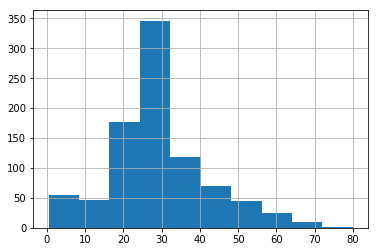

In [23]:
df['Age'].hist()

there where too many null values and replacing all those values with the mean changes too much the age distribuition, probably should use a random value between mean-std < age < mean+std or just drop it


### Did your embarking port influence your chances of survival?

In [54]:
df['Embarked'].value_counts(sort=False)

S    644
Q     77
C    168
Name: Embarked, dtype: int64

In [50]:
df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


there is some difference, but why?

### Can it be explained by different % of women embarking in each port?

In [77]:
df[['Embarked', 'PassengerId', 'Sex']].groupby(['Embarked', 'Sex']).count()

PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441

there were almost as many women as men embarkin in port C, that could explain the difference, but the same happens in port Q and the passengers from that port dont have the same survival chance

### Maybe the explanation is on the different classes?

In [83]:
df[['Embarked', 'PassengerId', 'Pclass']].groupby(['Embarked', 'Pclass']).count()

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

in port C most people went to first class, that explains the higher survival chance of that port

### What is the distribuition of the fare values?

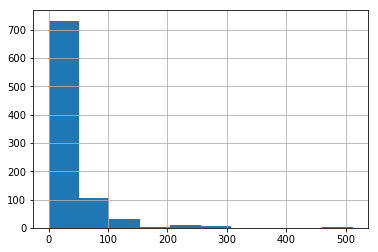

In [78]:
df['Fare'].hist()

### Does having simblings or spouses changes your chances of survival?

In [79]:
df[['SibSp', 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [87]:
df[['SibSp', 'PassengerId']].groupby('SibSp').count()

,PassengerId
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


having a spouse or sibling increases your survival chance, for the others the numbers of cases are small

### And having parents/ childrens?

In [89]:
df[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [90]:
df[['Parch', 'PassengerId']].groupby('Parch').count()

,PassengerId
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


TypeError: distplot() got an unexpected keyword argument 'hue'

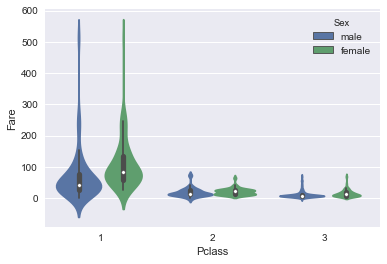

In [102]:
sns.violinplot(data=df, y='Fare', x='Pclass', hue='Sex')

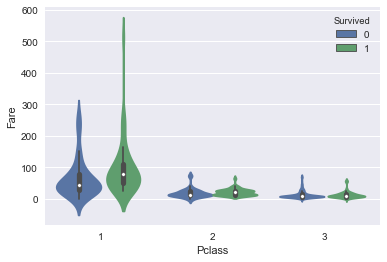

In [103]:
sns.violinplot(data=df, y='Fare', x='Pclass', hue='Survived')

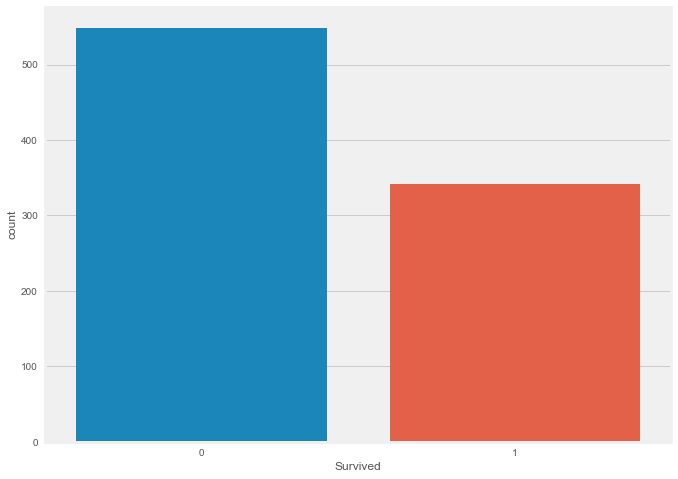

In [120]:
plt.figure(figsize=[10,8])
sns.countplot(df['Survived'])

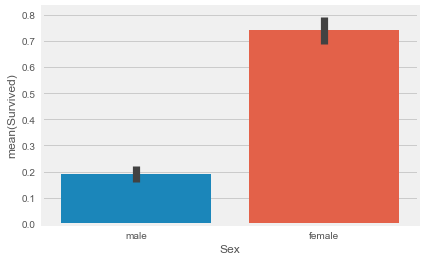

In [116]:
sns.barplot('Sex', 'Survived', data=df)

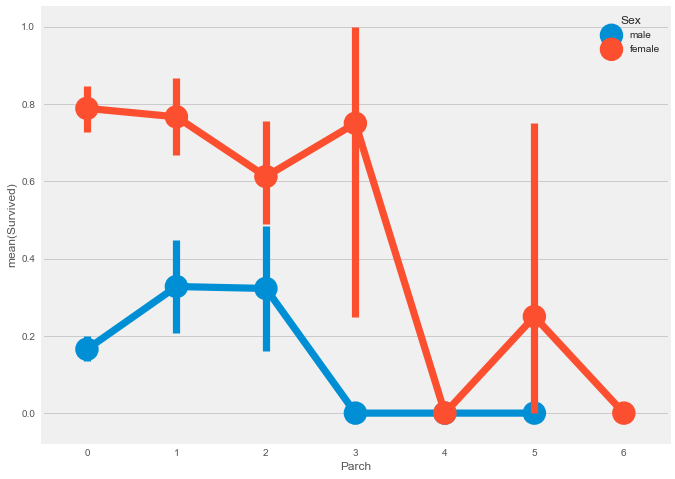

In [122]:
plt.figure(figsize=[10,8])
sns.pointplot(x='Parch', y='Survived', hue='Sex', data=df)

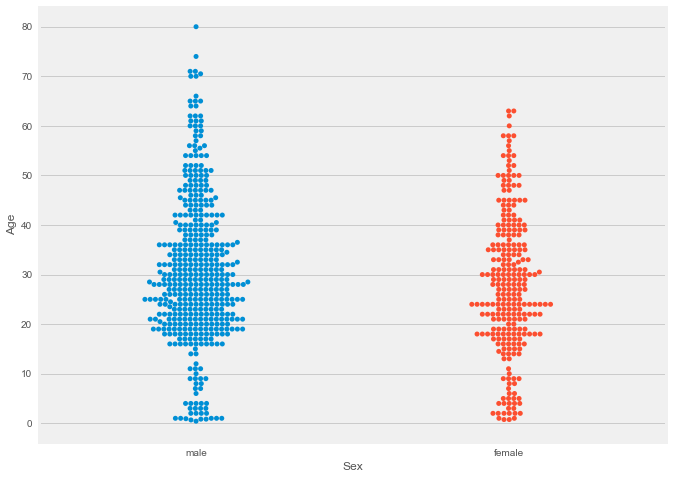

In [123]:
plt.figure(figsize=[10,8])
sns.swarmplot(x='Sex', y='Age', data=df)

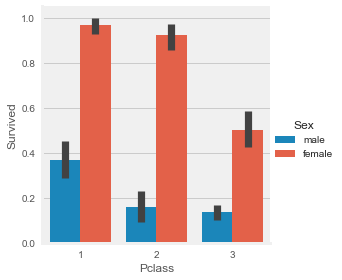

In [126]:
plt.figure(figsize=[10,8])
sns.factorplot('Pclass', 'Survived', 'Sex', data=df, kind='bar', legend=True)

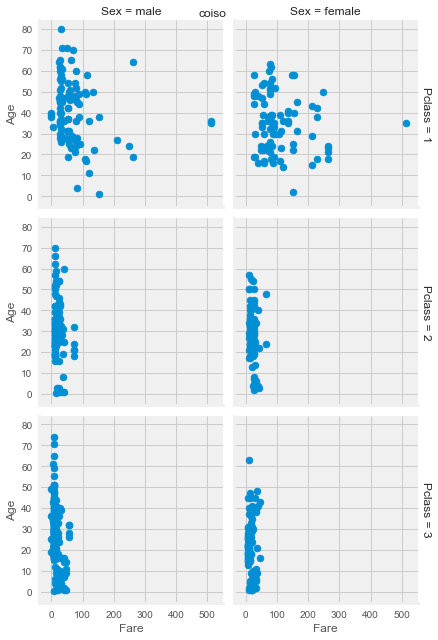

In [130]:
g = sns.FacetGrid(df, col='Sex', row='Pclass', margin_titles=True)
g.map(plt.scatter, 'Fare', 'Age')

g.fig.suptitle('coiso')